Importanto bibliotecas necessárias

In [164]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split 
from sklearn import tree
from sklearn.datasets import make_regression

# Introdução


**Contextualização**

Desde seu surgimento, a tuberculose nunca deixou de ser um desafio significativo para a saúde no Brasil. A tuberculo se é uma doença infecciosa causada pela bactéria Mycobacterium tuberculosis, que afeta principalmente os pulmões, mas pode se manifestar em outros órgãos. De acordo com o artigo “Mortalidade por tuberculose nas capitais brasileiras, 2008-2010”, publicado em 2017, diversos fatores no contexto brasileiro contribuem para a prevalência, disseminação e fatalidade causada pela tuberculose, incluindo condições socioeconômicas desfavoráveis, desigualdade social, a coinfeção com o vírus da imunodeficiência humana (HIV) ou ainda fatores ambientais.

Segundo Olavo Henrique Leite, médico do Hospital das Clínicas, a tuberculose mata 14 pessoas por dia no Brasil, sendo mais de 5 mil mortes em 2021 e 78 mil novos casos em 2022. É importante ressaltar que a tuberculose é uma doença grave e que pode ser fatal se não tratada adequadamente. Assim, é fundamental entender os padrões e fatores que incentivam sua proliferação e fatalidade para melhor contorná-los.


**Tema e Objetivo**

O presente projeto de Ciência dos Dados busca averiguar se os fatores que foram identificados e estudados no artigo “Mortalidade por tuberculose nas capitais brasileiras, 2008-2010”, continuaram os mesmos para o ano de 2010. Logo, a pergunta que guiou o projeto foi:

```
Os fatores que mais influenciaram o número de mortes causados pela tuberculose nas capitais brasileiras em 2008 continuaram os mesmos para o ano de 2010?
```

**Base de Dados - Dicionário**

Para critério de comparação com a pesquisa citada, selecionaram-se os mesmos dados de todas as capitais brasileiras para o ano de 2010, com a adição de alguns outros para maior e mais profunda análise exploratória da disseminação de Tuberculose nessas cidades. A maior parte dos dados foram disponibilizados pelo DataSUS, que fornece diversos indicadores de saúde, por exemplo, o INMET, sendo selecionados dados das estações metereológicas de cada capital sobre temperatura, umidade e precipitação e o IBGE, Instituto Brasileiro de Geografia e Estatística, utilizado para identificar fatores socioeconômicos como analfabetismo, o Índice de Desenvolvimento Humando, entre outros.

O dicionário com breve explicação do que cada uma das colunas finais significam está a seguir.

- *Capital:* Cada uma das 26 capitais brasileiras;
- *Pop. Residente:* População que residia na capital;
- *Codigo da Capital:* Código fornecido pelo IBGE para cada cidade;
- *Sigla da Unidade da Federação:* Sigla do Estado no qual essa cidade é capital;
- *Nome das Grades Regiões:* Região em que tal cidade está situada;
- *IDHM 2010:* Índice de Desenvolvimento Humano Municipal, uma medida calculada a partir de fatores como educação, longevidade e renda, variando de 0 a 1. Quão maior esse indicador, melhores são as condições de qualidade de vida. Considera-se o Índice de Desenvolvimento Humano alto valores acima de 0.8;
- *Emigrantes de Países Estrangeiros:* Quantidade de pessoas vindas de fora do Brasil que habitam a cidade;
- *Obtos Tuberculose:* Coeficiente de óbitos causados pela tuberculose por 100.000 habitantes.
- *Indice Gini*: Indicador numérico que reflete a desigualdade de distribuição de renda entre a população de cada cidade, variando de 0 a 1. Valores mais próximos de 0 indicam menor desigualdade de renda entre a população.
- *Pop. Pobre Branca*: Porcentagem da população branca dentre as pessoas pobres na capital.
- *Pop. Pobre Preta*: Porcentagem da população preta dentre as pessoas pobres na capital.
- *Pop. Pobre Parda*: Porcentagem da população parda dentre as pessoas pobres na capital.
- *Pop. Pobre Total*: Porcentagem da população pobre na capital.
- *Tx. Desemprego*:  Percentual da população de 16 anos e mais, economicamente ativa, desocupada.
- *Coef. de Obtos por Aids*:  Coeficiente de obtos por Aids a cada 100 mil habitantes.
- *Tx. Analfabetismo*: Porcentagem da população de 15 ou mais anos não alfabetizada.
- *Precipitacao Total(mm)*: Quantidade total de chuva (em mm), durante o ano.
- *Temperatura Max*: Média das temperaturas máximas (em °C)medidas na cidade durante o ano.
- *Temperatura Min*: Média das temperaturas mínimas (em °C) medidas na cidade durante o ano.
- *Umidade Relativa do Ar*: Média da umidade relativa do ar (em %) medidas na cidade durante o ano.




#### **Manipulação e Confecção do DataFrame**

*Importa planilhas sobre fatores Socioeconômicos e Saúde:*

In [126]:
desemprego0 = pd.read_excel('planilhas capitais/%_desemprego.xlsx')
pobres_brancos_negros0 = pd.read_excel('planilhas capitais/%_pobres_brancos_negros2.xlsx')
indice_gini0 = pd.read_excel('planilhas capitais/Indice_Gini_2010.xlsx')
aids0 = pd.read_excel('planilhas capitais/Coef_ObtosPorAids.xlsx')
analfabetismo0 = pd.read_excel('planilhas capitais/%_anafabetismo.xlsx')
turbeculoseobtos0 = pd.read_excel('planilhas capitais/Coef_ObtosPorTurbeculose.xlsx')
IDH0 = pd.read_excel('planilhas capitais/IDH_IBGE.xlsx')
pop_total0 = pd.read_excel('planilhas capitais/Pop_Residente.xlsx')
migracao0 = pd.read_excel('planilhas capitais/Migracao_2010.xlsx')

C:\Users\aliso\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\openpyxl\worksheet\header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")
C:\Users\aliso\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\openpyxl\worksheet\header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


*Importa planilhas sobre as Estações Metereológicas:*

In [127]:
Brasilia = pd.read_excel('estações capitais\INMET_CO_DF_A001_BRASILIA_01-01-2010_A_31-12-2010.xlsx')
Goiana= pd.read_excel('estações capitais\INMET_CO_GO_A014_GOIAS_01-01-2010_A_31-12-2010.xlsx')
Campo_Grande = pd.read_excel('estações capitais/INMET_CO_MS_A702_CAMPO GRANDE_01-01-2010_A_31-12-2010.xlsx')
Cuiaba= pd.read_excel('estações capitais\INMET_CO_MT_A901_CUIABA_01-01-2010_A_31-12-2010.xlsx')
Rio_Branco = pd.read_excel('estações capitais\INMET_N_AC_A104_RIO BRANCO_01-01-2010_A_31-12-2010.xlsx')
Manaus = pd.read_excel('estações capitais\INMET_N_AM_A101_MANAUS_01-01-2010_A_31-12-2010.xlsx')
Belem = pd.read_excel('estações capitais\INMET_N_PA_A201_BELEM_01-01-2010_A_31-12-2010.xlsx')
Porto_Velho= pd.read_excel('estações capitais\INMET_N_RO_A938_VILHENA_01-01-2010_A_31-12-2010.xlsx')
Boa_vista = pd.read_excel('estações capitais\INMET_N_RR_A135_BOA VISTA_26-08-2010_A_31-12-2010.xlsx')
Palmas= pd.read_excel('estações capitais\INMET_N_TO_A009_PALMAS_01-01-2010_A_31-12-2010.xlsx')
Maceio= pd.read_excel('estações capitais\INMET_NE_AL_A303_MACEIO_01-01-2010_A_31-12-2010.xlsx')
Salvador = pd.read_excel('estações capitais\INMET_NE_BA_A401_SALVADOR_01-01-2010_A_31-12-2010.xlsx')
Fortaleza = pd.read_excel('estações capitais\INMET_NE_CE_A305_FORTALEZA_01-01-2010_A_31-12-2010.xlsx')
Sao_luiz = pd.read_excel('estações capitais\INMET_NE_MA_A203_SAO LUIS_01-01-2010_A_31-12-2010.xlsx')
Joao_Pessoa = pd.read_excel('estações capitais\INMET_NE_PB_A320_JOAO PESSOA_01-01-2010_A_31-12-2010.xlsx')
Recife = pd.read_excel('estações capitais\INMET_NE_PE_A301_RECIFE_01-01-2010_A_31-12-2010.xlsx')
Teresina= pd.read_excel('estações capitais\INMET_NE_PI_A312_TERESINA_01-01-2010_A_31-12-2010.xlsx')
Natal = pd.read_excel('estações capitais\INMET_NE_RN_A304_NATAL_01-01-2010_A_31-12-2010.xlsx')
Aracaju = pd.read_excel('estações capitais\INMET_NE_SE_A409_ARACAJU_01-01-2010_A_31-12-2010.xlsx')
Curitiba = pd.read_excel('estações capitais\INMET_S_PR_A807_CURITIBA_01-01-2010_A_31-12-2010.xlsx')
Porto_Alegre = pd.read_excel('estações capitais\INMET_S_RS_A801_PORTO ALEGRE_01-01-2010_A_31-12-2010.xlsx')
Florianopolis = pd.read_excel('estações capitais\INMET_S_SC_A806_FLORIANOPOLIS_01-01-2010_A_31-12-2010.xlsx')
Vitoria = pd.read_excel('estações capitais\INMET_SE_ES_A612_VITORIA_01-01-2010_A_31-12-2010.xlsx')
Belo_Horizonte= pd.read_excel('estações capitais\INMET_SE_MG_A521_PAMPULHA_01-01-2010_A_31-12-2010.xlsx')
Rio_de_Janeiro = pd.read_excel('estações capitais\INMET_SE_RJ_A652_FORTE DE COPACABANA_01-01-2010_A_31-12-2010.xlsx')
Sao_Paulo = pd.read_excel('estações capitais\INMET_SE_SP_A701_SAO PAULO - MIRANTE_01-01-2010_A_31-12-2010.xlsx')

*Dicionário para compatibilidade entre os DataFrames e guardar as informações de cada capital:*

In [128]:
dic_cidades = {
    'Brasília': Brasilia,
    'Goiânia': Goiana,
    'Campo Grande': Campo_Grande,
    'Cuiabá': Cuiaba,
    'Rio Branco': Rio_Branco,
    'Manaus': Manaus,
    'Belém': Belem,
    'Porto Velho': Porto_Velho,
    'Boa Vista': Boa_vista,
    'Palmas': Palmas,
    'Maceió': Maceio,
    'Salvador': Salvador,
    'Fortaleza': Fortaleza,
    'São Luís': Sao_luiz,
    'João Pessoa': Joao_Pessoa,
    'Recife': Recife,
    'Teresina': Teresina,
    'Natal': Natal,
    'Aracaju': Aracaju,
    'Curitiba': Curitiba,
    'Porto Alegre': Porto_Alegre,
    'Florianópolis': Florianopolis,
    'Vitória': Vitoria,
    'Belo Horizonte': Belo_Horizonte,
    'Rio de Janeiro': Rio_de_Janeiro,
    'São Paulo': Sao_Paulo
}

*Função que remove colunas inutilizadas e linhas com valores de erro (-9999)*:

In [129]:
def deleta_colunas(dic_cidades):
    dic_cidades2 = {}
    for cidade, dataframe in dic_cidades.items():
        lista=['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)',
        'TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C)',
        'TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C)',
        'UMIDADE RELATIVA DO AR, HORARIA (%)']
        
        dataframe2 = dataframe[lista]
        dataframe3 = dataframe2.drop(dataframe2[dataframe2['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)'] == -9999].index)
        dataframe4 = dataframe3.drop(dataframe3[dataframe3['TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C)'] == -9999].index)
        dataframe5 = dataframe4.drop(dataframe4[dataframe4['TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C)'] == -9999].index)
        dataframe6 = dataframe5.drop(dataframe5[dataframe5['UMIDADE RELATIVA DO AR, HORARIA (%)'] == -9999].index)
        
     
        dic_cidades2[cidade] = dataframe6

    return dic_cidades2

*Calcula a quantidade de chuvas, média da temperatura e umidade relativa do ar ao longo do ano e as adiciona no dicionário de cada cidade:*

In [130]:
def dados_meteriologicos(dic_estacoes):
    data = {}
    for cidade, dataframe_estacao in dic_estacoes.items():
        if 'Capital' not in data:
            data['Capital'] = [cidade]
            data['Precipitacao Total(mm)'] = [dataframe_estacao['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)'].sum()]
            data['Temperatura'] = [dataframe_estacao['TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C)'].sum()/len(dataframe_estacao['TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C)'])]
            data['Unimidade Relativa do Ar'] = [dataframe_estacao['UMIDADE RELATIVA DO AR, HORARIA (%)'].sum()/len(dataframe_estacao['UMIDADE RELATIVA DO AR, HORARIA (%)'])]
        else: 
            data['Capital'] += [cidade]
            data['Precipitacao Total(mm)'] += [dataframe_estacao['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)'].sum()]
            data['Temperatura'] += [dataframe_estacao['TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C)'].sum()/len(dataframe_estacao['TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C)'])]
            data['Unimidade Relativa do Ar'] += [dataframe_estacao['UMIDADE RELATIVA DO AR, HORARIA (%)'].sum()/len(dataframe_estacao['UMIDADE RELATIVA DO AR, HORARIA (%)'])]

    
    return data

*Deleta outras colunas que não serão utilizadas:*

In [131]:
del IDH0['Código da Unidade da Federação']
del IDH0['Código IBGE da Mesoregião']
del IDH0['Nome da Mesoregião']
del IDH0['Código IBGE da Microregião']
del IDH0['Nome da Microregião']
del IDH0['IDHM 1991']
del IDH0['IDHM 2000']

del indice_gini0[1991]
del indice_gini0[2000]

del migracao0['Código da Unidade da Federação']
del migracao0['Código IBGE da Mesoregião']
del migracao0['Nome da Mesoregião']
del migracao0['Código IBGE da Microregião']
del migracao0['Nome da Microregião']
del migracao0['Sigla da Unidade da Federação']
del migracao0['Nome das Grandes Regiões']

*Remove as últimas linhas com informações adicionais ou notas:*

In [132]:
df_desemprego0 = desemprego0.drop(desemprego0.index[-6:])
df_pobres0 = pobres_brancos_negros0.drop(pobres_brancos_negros0.index[-9:])
df_indice_gini0= indice_gini0.drop(indice_gini0.index[-2:])
df_aids0 = aids0.drop(aids0.index[-9:])
df_analfabetismo0 = analfabetismo0.drop(analfabetismo0.index[-10:])
df_poptotal0 = pop_total0.drop(pop_total0.index[-13:])
df_obtostubrculose0= turbeculoseobtos0.drop(turbeculoseobtos0.index[-9:])

*Renomeia colunas:*

In [133]:
df_pobres = df_pobres0.rename(columns={'Parda': 'Pop. Pobre Parda', 'Total': 'Pop. Pobre Total','Branca': 'Pop. Pobre Branca','Preta': 'Pop. Pobre Preta'})
df_aids = df_aids0.rename(columns={'TME_p/aids': 'Coef. de Obtos por Aids'})
df_analfabetismo = df_analfabetismo0.rename(columns={'Taxa_de_analfabetismo_(15a_e+)': 'Tx. Analfabetismo'})
df_desemprego = df_desemprego0.rename(columns={'Tx_desemprego_16_anos_e_+_(%)': 'Tx. Desemprego'})
df_gini = df_indice_gini0.rename(columns={2010: 'Indice Gini'})
df_IDH = IDH0.rename(columns={'Código IBGE do Município': 'Codigo da Capital'})
df_poptotal = df_poptotal0.rename(columns={'População_residente': 'Pop. Residente'})
df_obtostubrculose = df_obtostubrculose0.rename(columns={'TME_p/tuberculose':'Obtos Tuberculose'})
df_migracao = migracao0.rename(columns={'Código IBGE do Município': 'Codigo da Capital','População residente por lugar de nascimento - País estrangeiro':'Emigrantes de Países Estrangeiros'})

*Separa as colunas das planilhas que possuem o Código e Nome da capital na mesma célula:*


In [134]:
def separa_codigo(planilha):
    colunas = list(planilha)
    if "Capital" in colunas:
        planilha[['Codigo da Capital', 'Capital']] = planilha['Capital'].str.split(' ', n=1, expand=True)
        planilha_limpa = planilha
        
    else: 
        planilha_limpa = planilha
    return planilha_limpa

*Aplica as funções:*

In [135]:
df_poptotal1 = separa_codigo(df_poptotal)
dic_cidades2 = deleta_colunas(dic_cidades)
df_estacoes = dados_meteriologicos(dic_cidades2)
df_estacoes2 = pd.DataFrame(df_estacoes)


*Mergindo para um único DataFrame:*

In [136]:
df_poptotal1["Codigo da Capital"] = df_poptotal1['Codigo da Capital'].astype(int)
result = pd.merge(df_poptotal, df_IDH, how='inner', on='Codigo da Capital')
result_01 = pd.merge(result, df_migracao, how='inner', on='Codigo da Capital')
result_0 = pd.merge(result_01, df_obtostubrculose, how='inner', on='Capital')
result_1 = pd.merge(result_0, df_gini, how='inner', on='Capital')
result_2 = pd.merge(result_1, df_pobres, how='inner', on='Capital')
result_3 = pd.merge(result_2, df_desemprego, how='inner', on='Capital')
result_4 = pd.merge(result_3, df_aids, how='inner', on='Capital')
result_5 = pd.merge(result_4, df_analfabetismo, how='inner', on='Capital')
result_6 = pd.merge(result_5, df_estacoes2, how='inner', on='Capital')

*Base de dados pronta:*

In [137]:
df = result_6

*Base de dados ordenada pelo nome da capital:*

In [138]:
df1 = df.copy()
df2 = df1.sort_values(by='Capital', ascending=True)

In [139]:
df2.head(3)

,Capital,Pop. Residente,Codigo da Capital,Sigla da Unidade da Federação,Nome das Grandes Regiões,IDHM 2010,Emigrantes de Países Estrangeiros,Obtos Tuberculose,Indice Gini,Pop. Pobre Branca,Pop. Pobre Preta,Pop. Pobre Parda,Pop. Pobre Total,Tx. Desemprego,Coef. de Obtos por Aids,Tx. Analfabetismo,Precipitacao Total(mm),Temperatura,Unimidade Relativa do Ar
13,Aracaju,571149.0,280030,SE,Nordeste,0.770,492,2.3,0.6341,9.90,15.04,14.42,12.92,10.71,4.6,6.59,1170.6,23.331515,79.529952
15,Belo Horizonte,2375151.0,310620,MG,Sudeste,0.810,8119,0.9,0.6106,4.22,6.76,6.86,5.61,6.21,5.4,2.80,1645.6,15.614279,68.094430
4,Belém,1393399.0,150140,PA,Norte,0.746,2453,3.4,0.6284,11.44,15.37,16.87,15.28,10.07,13.7,3.31,2821.8,23.709100,80.441066


*Verifica se possui valores nulos*:

In [140]:
df.isnull().sum()

Capital                              0
Pop. Residente                       0
Codigo da Capital                    0
Sigla da Unidade da Federação        0
Nome das Grandes Regiões             0
IDHM 2010                            0
Emigrantes de Países Estrangeiros    0
Obtos Tuberculose                    0
Indice Gini                          0
Pop. Pobre Branca                    0
Pop. Pobre Preta                     0
Pop. Pobre Parda                     0
Pop. Pobre Total                     0
Tx. Desemprego                       0
Coef. de Obtos por Aids              0
Tx. Analfabetismo                    0
Precipitacao Total(mm)               0
Temperatura                          0
Unimidade Relativa do Ar             0
dtype: int64

*Verificando se possui valores Nan:*

In [141]:
df.isna().sum()

Capital                              0
Pop. Residente                       0
Codigo da Capital                    0
Sigla da Unidade da Federação        0
Nome das Grandes Regiões             0
IDHM 2010                            0
Emigrantes de Países Estrangeiros    0
Obtos Tuberculose                    0
Indice Gini                          0
Pop. Pobre Branca                    0
Pop. Pobre Preta                     0
Pop. Pobre Parda                     0
Pop. Pobre Total                     0
Tx. Desemprego                       0
Coef. de Obtos por Aids              0
Tx. Analfabetismo                    0
Precipitacao Total(mm)               0
Temperatura                          0
Unimidade Relativa do Ar             0
dtype: int64

*Observando o tipo da variável:*

In [142]:
#Mudando todos as variáveis quantitatovas para float:
df2["Obtos Tuberculose"] = df2['Obtos Tuberculose'].astype(float)
df2["Emigrantes de Países Estrangeiros"] = df2['Emigrantes de Países Estrangeiros'].astype(float)
df2.dtypes

Capital                               object
Pop. Residente                       float64
Codigo da Capital                      int32
Sigla da Unidade da Federação         object
Nome das Grandes Regiões              object
IDHM 2010                            float64
Emigrantes de Países Estrangeiros    float64
Obtos Tuberculose                    float64
Indice Gini                          float64
Pop. Pobre Branca                    float64
Pop. Pobre Preta                     float64
Pop. Pobre Parda                     float64
Pop. Pobre Total                     float64
Tx. Desemprego                       float64
Coef. de Obtos por Aids              float64
Tx. Analfabetismo                    float64
Precipitacao Total(mm)               float64
Temperatura                          float64
Unimidade Relativa do Ar             float64
dtype: object

*Guarda variáveis quantitativas em um DataFrame*

In [143]:
variaveis_quant = df2.select_dtypes(include = ['float']) 

In [144]:
variaveis_quant.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Pop. Residente,26.0,1.733378e+06,2.314207e+06,228332.000000,556110.750000,973792.500000,1.789487e+06,1.125350e+07
IDHM 2010,26.0,7.781923e-01,3.478508e-02,0.721000,0.752500,0.771000,8.035000e-01,8.470000e-01
Emigrantes de Países Estrangeiros,26.0,1.164400e+04,3.139535e+04,178.000000,920.500000,2910.500000,5.520750e+03,1.510710e+05
Obtos Tuberculose,26.0,2.942308e+00,1.740614e+00,0.500000,2.000000,2.700000,4.075000e+00,6.800000e+00
Indice Gini,26.0,6.152077e-01,3.013204e-02,0.547400,0.595400,0.619400,6.339250e-01,6.894000e-01
Pop. Pobre Branca,26.0,7.926154e+00,3.252030e+00,2.330000,4.875000,8.270000,1.049500e+01,1.307000e+01
Pop. Pobre Preta,26.0,1.231769e+01,4.880011e+00,2.650000,8.822500,12.925000,1.647250e+01,1.904000e+01
Pop. Pobre Parda,26.0,1.235769e+01,4.631554e+00,4.470000,8.257500,13.015000,1.556750e+01,1.908000e+01
Pop. Pobre Total,26.0,1.063462e+01,4.522266e+00,2.570000,6.222500,11.200000,1.461500e+01,1.734000e+01
Tx. Desemprego,26.0,8.185385e+00,2.513667e+00,4.610000,6.250000,7.430000,1.004500e+01,1.272000e+01


In [145]:
variaveis_quant

,Pop. Residente,IDHM 2010,Emigrantes de Países Estrangeiros,Obtos Tuberculose,Indice Gini,Pop. Pobre Branca,Pop. Pobre Preta,Pop. Pobre Parda,Pop. Pobre Total,Tx. Desemprego,Coef. de Obtos por Aids,Tx. Analfabetismo,Precipitacao Total(mm),Temperatura,Unimidade Relativa do Ar
13,571149.0,0.770,492.0,2.3,0.6341,9.90,15.04,14.42,12.92,10.71,4.6,6.59,1170.6,23.331515,79.529952
15,2375151.0,0.810,8119.0,0.9,0.6106,4.22,6.76,6.86,5.61,6.21,5.4,2.80,1645.6,15.614279,68.094430
4,1393399.0,0.746,2453.0,3.4,0.6284,11.44,15.37,16.87,15.28,10.07,13.7,3.31,2821.8,23.709100,80.441066
3,284313.0,0.752,1791.0,0.7,0.5936,10.65,17.78,15.47,14.76,7.33,8.4,5.66,447.0,22.601384,72.465063
25,2570160.0,0.824,8577.0,0.5,0.6370,5.32,7.55,7.96,6.77,7.83,4.6,3.59,1312.4,14.177881,64.439188
22,786797.0,0.784,3828.0,2.3,0.5720,4.27,6.02,6.60,5.40,6.22,8.6,3.80,1202.6,15.751587,64.537769
23,551098.0,0.785,812.0,3.8,0.6008,5.31,9.13,8.85,7.65,6.41,12.0,4.46,1056.4,18.660191,65.062221
19,1751907.0,0.823,13160.0,0.6,0.5652,3.51,4.71,5.44,3.87,4.61,8.0,2.09,737.8,14.570580,76.032490
20,421240.0,0.847,4622.0,1.9,0.5474,2.33,2.65,4.47,2.57,4.81,15.7,1.94,2073.2,17.522570,79.612737
8,2452185.0,0.754,4001.0,4.9,0.6267,9.85,19.04,15.60,13.61,7.53,4.5,6.82,224.0,22.491734,69.870316


*Plotando todas as combinações variáveis quantitativas*

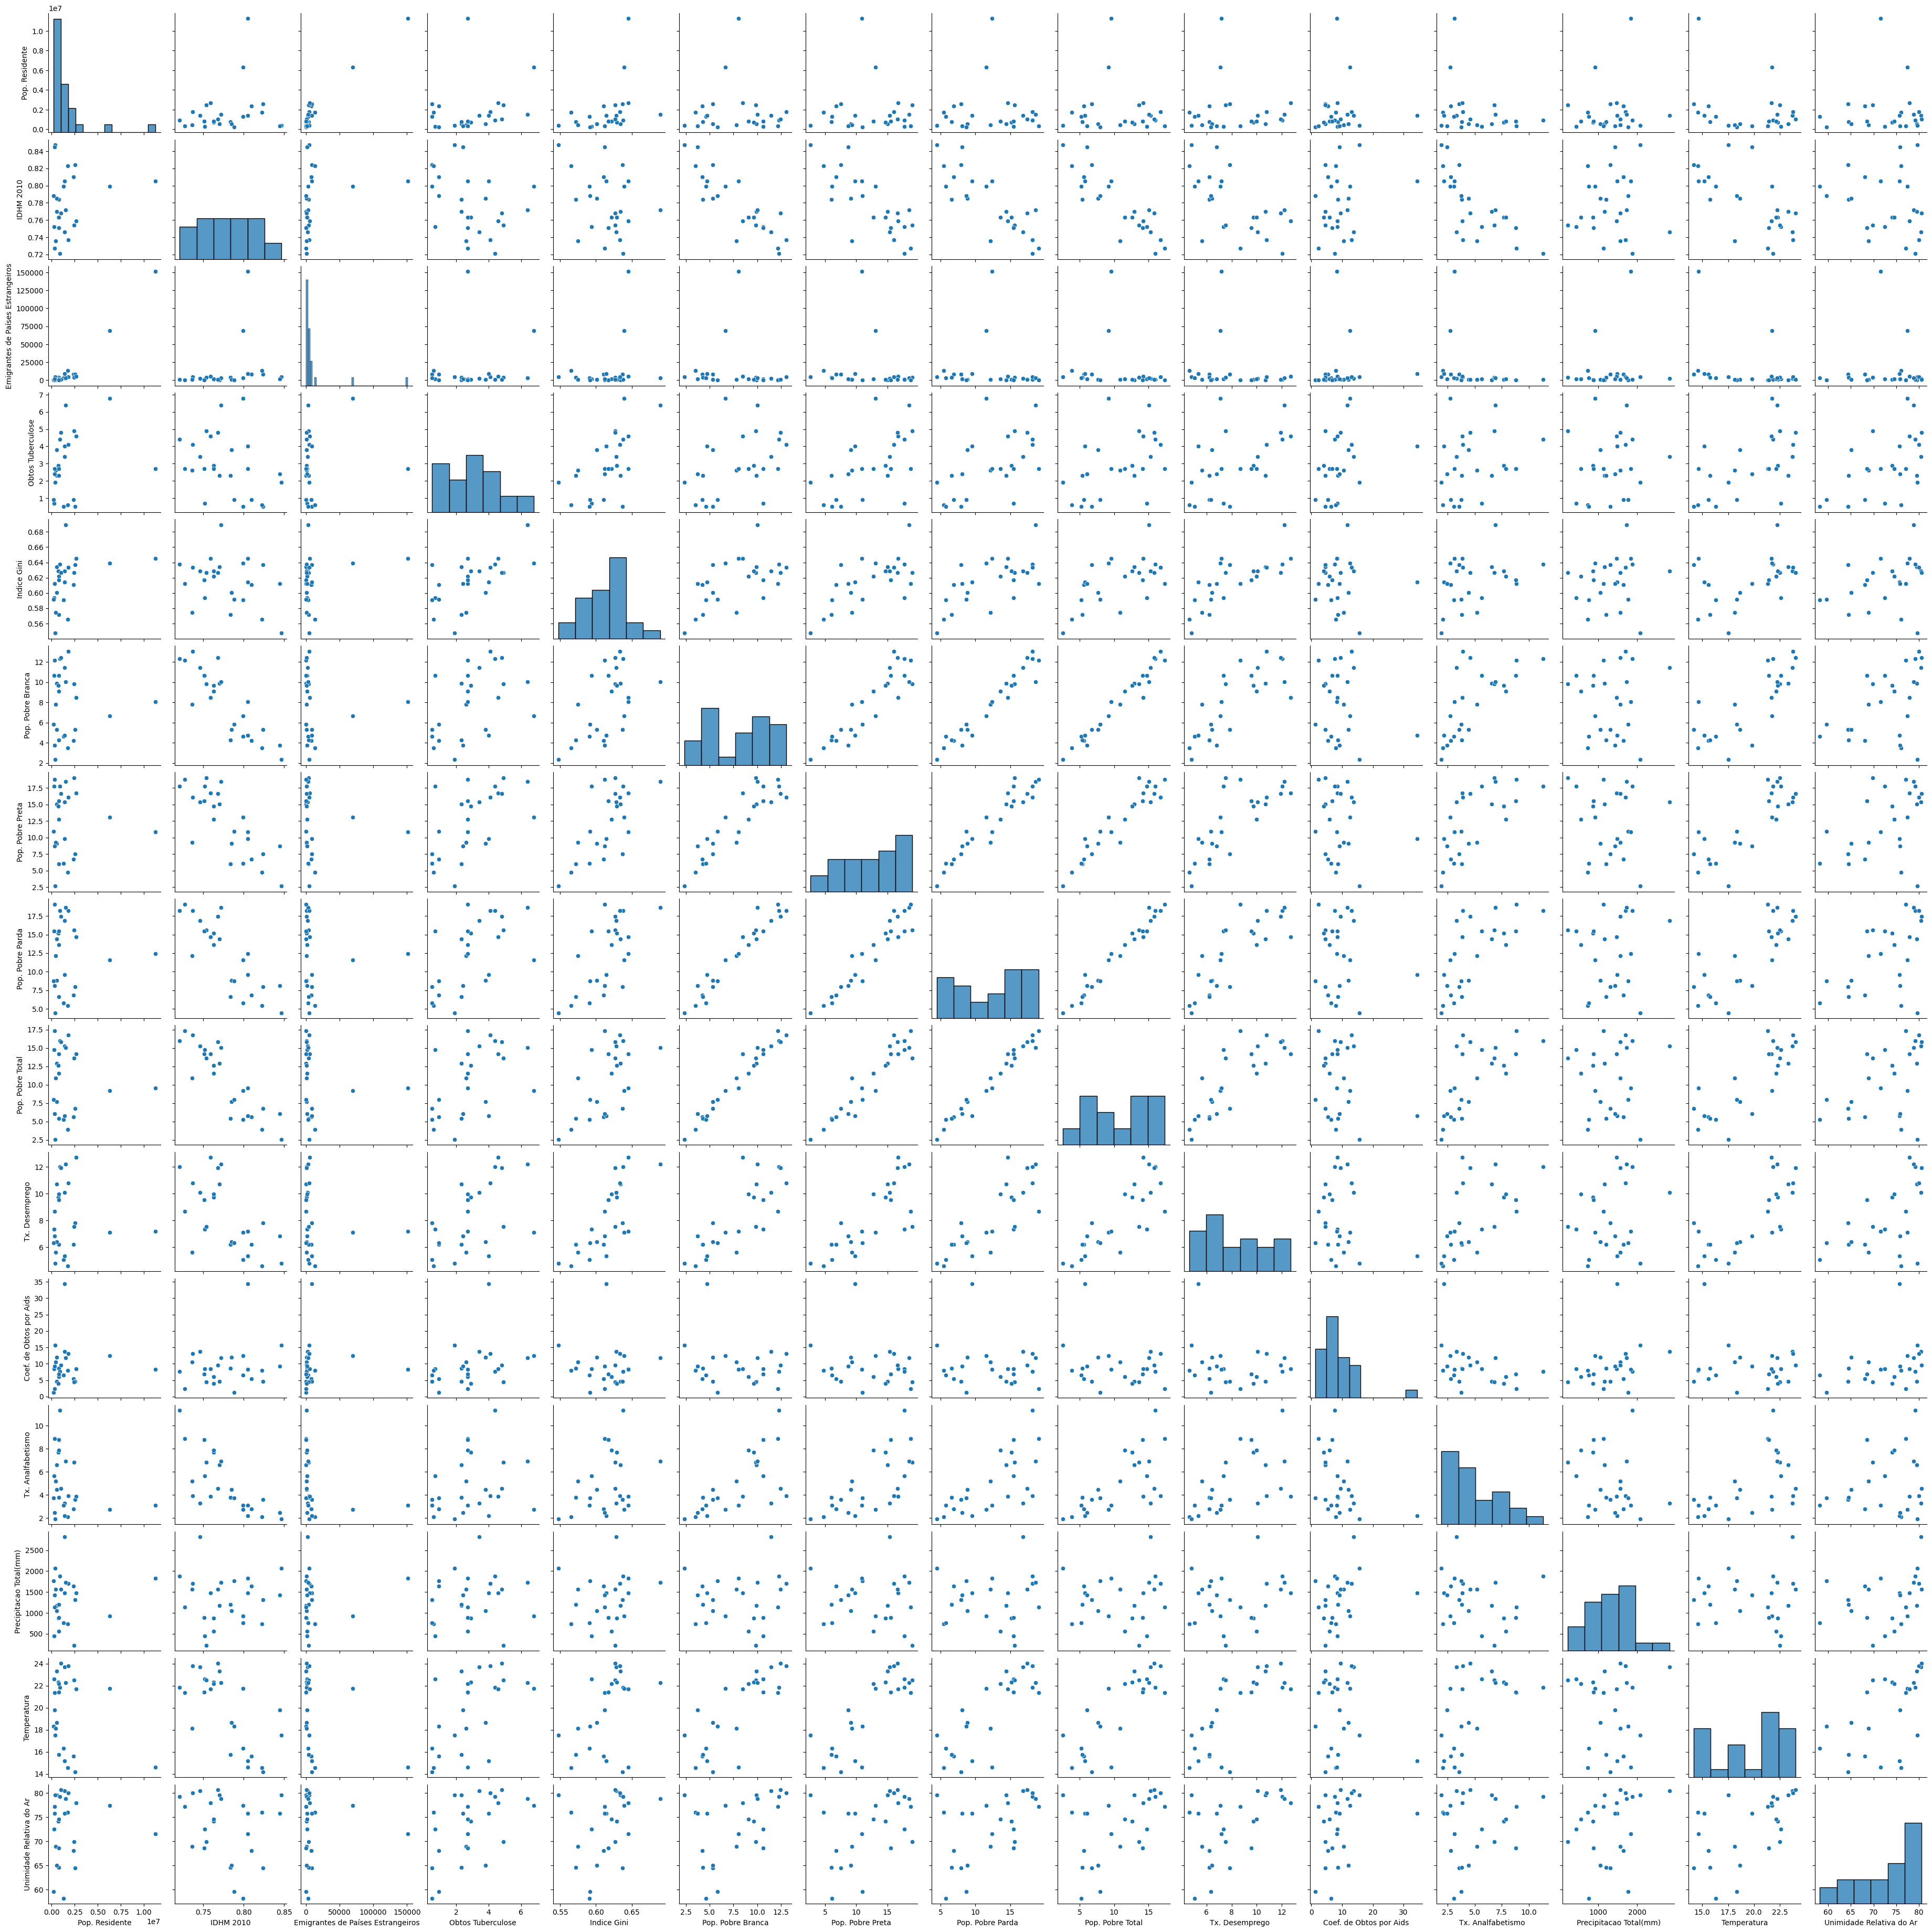

In [146]:
sns.pairplot(variaveis_quant)
plt.show()

## Análise Exploratória dos Dados:

A análise exploratória de dados permite compreender a estrutura dos dados, identificar padrões, tendências e anomalias, além de fornecer insights valiosos para tomadas de decisão e desenvolvimento de modelos preditivos. A finalidade da Análise Exploratória de Dados é examinar os dados previamente à aplicação de qualquer técnica estatística. Desta forma o analista consegue um entendimento básico de seus dados e das relações existentes entre as variáveis analisadas.

**Correlação através de um HeatMap**

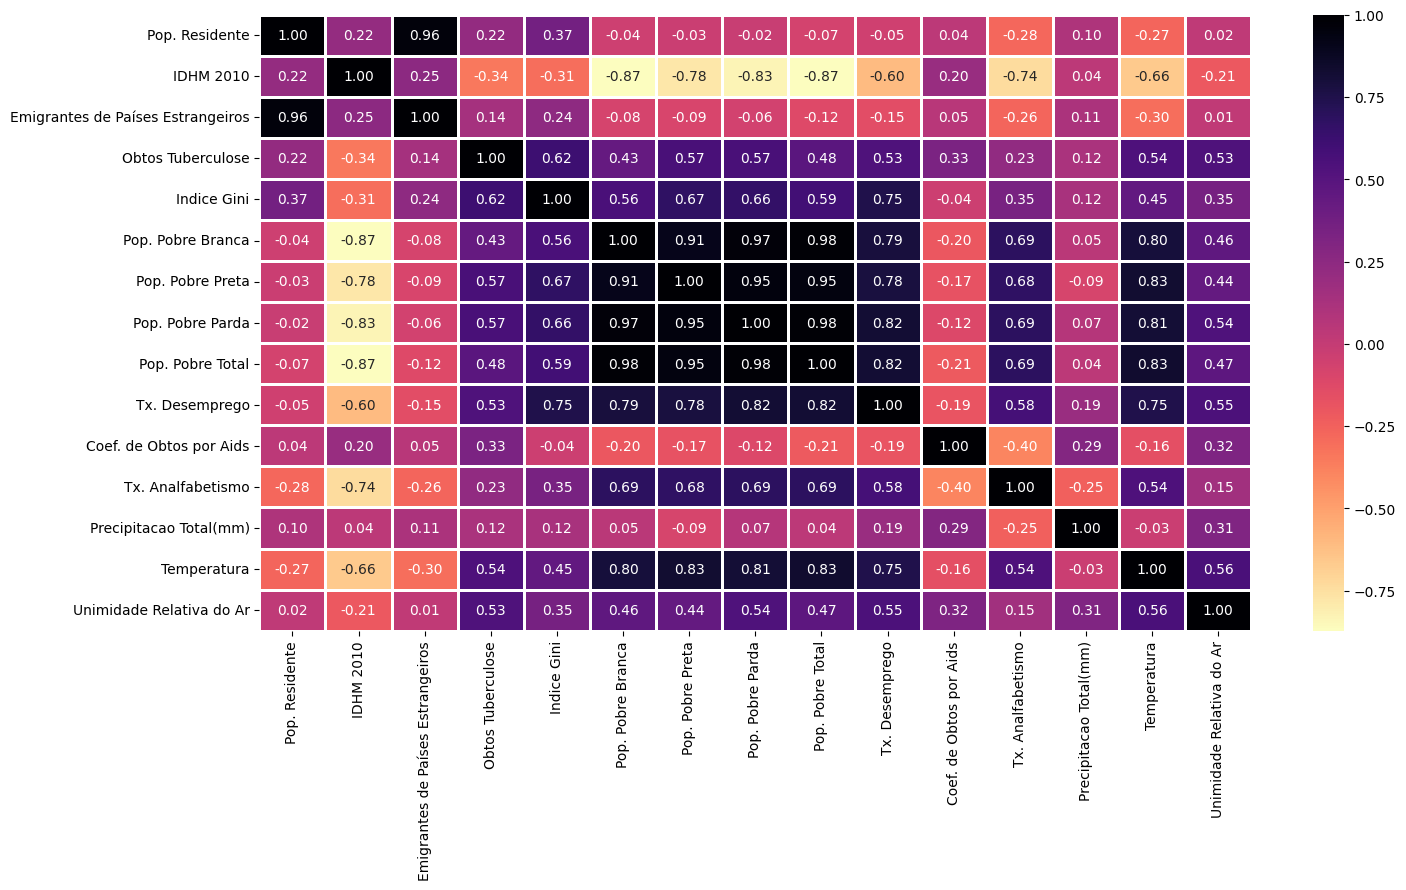

In [147]:
plt.figure(figsize=(16, 8))

sns.heatmap(variaveis_quant.corr(),
            cmap = 'magma_r',
            fmt = '.2f',
            linewidths = 2,
            annot = True)
plt.show()


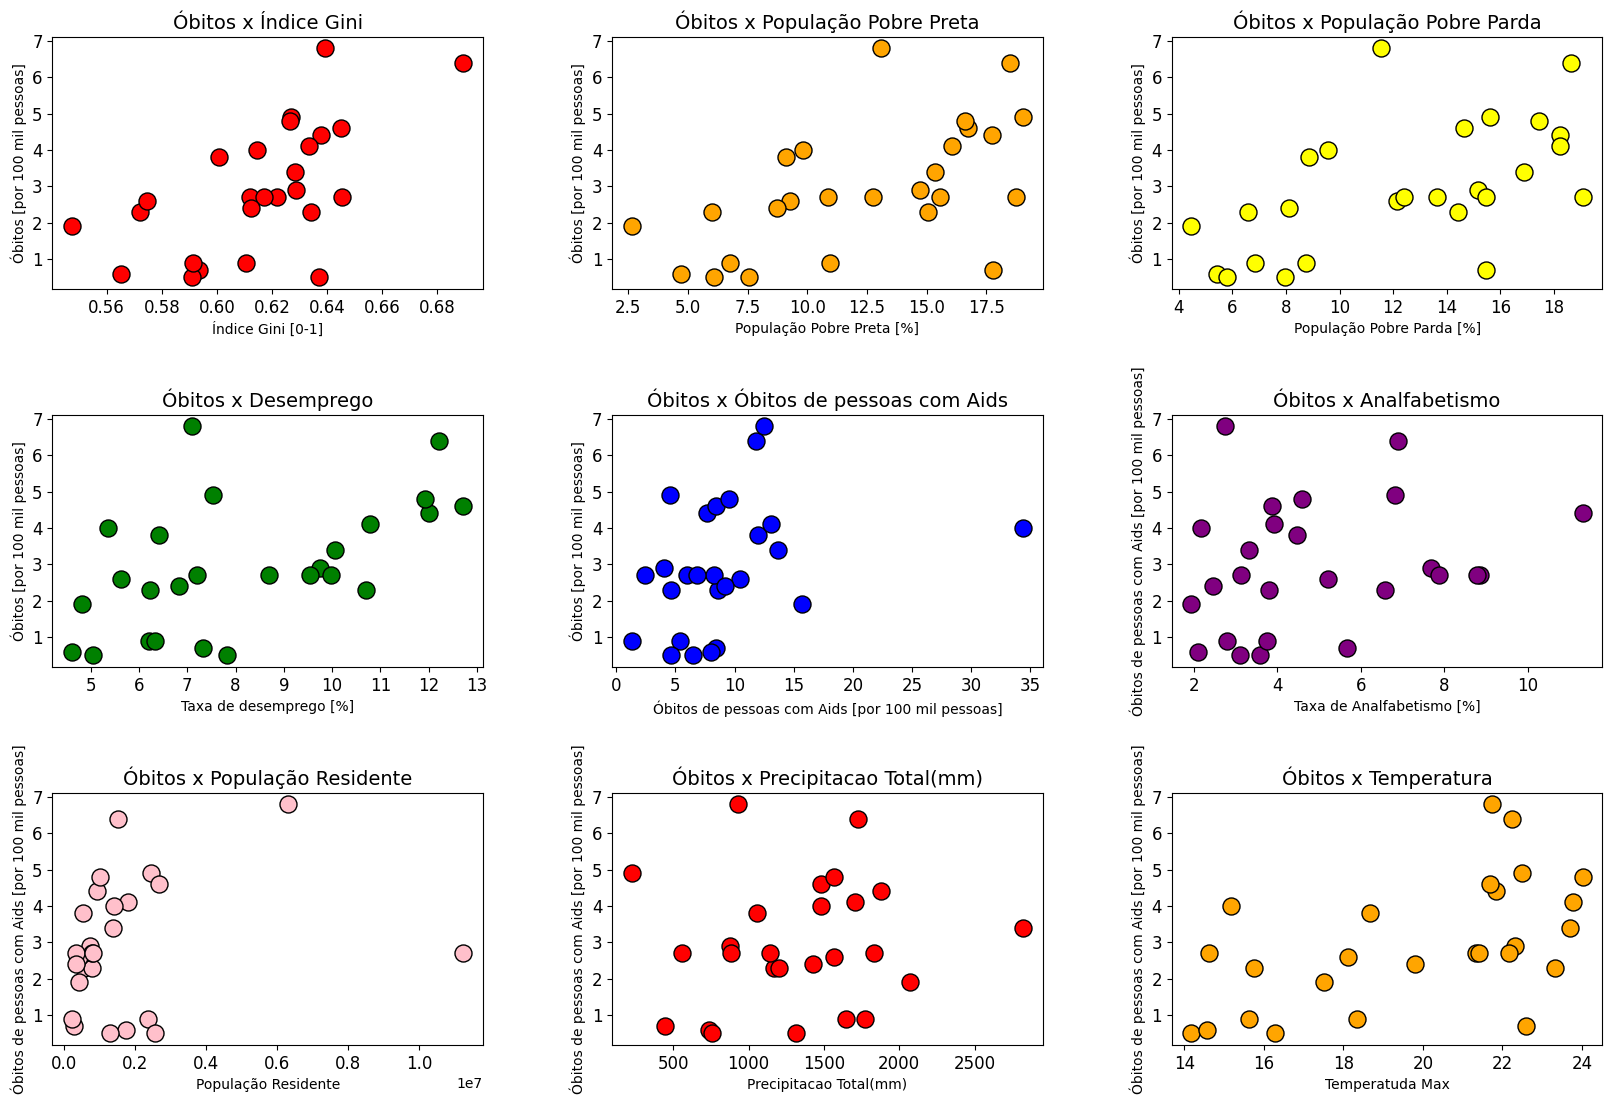

In [148]:
import matplotlib.pyplot as plt
import pandas as pd

dataframe = variaveis_quant

plt.figure(figsize=(20,18))
plt.subplots_adjust(wspace=0.3, hspace=0.5)

plt.subplot(431)
plt.scatter(dataframe['Indice Gini'], dataframe['Obtos Tuberculose'], color='red', edgecolor='k', s=150)
plt.title('Óbitos x Índice Gini', fontsize=14)
plt.xlabel('Índice Gini [0-1]', fontsize=10)
plt.ylabel('Óbitos [por 100 mil pessoas]', fontsize=10)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig('scatter1.png')

plt.subplot(432)
plt.scatter(dataframe['Pop. Pobre Preta'], dataframe['Obtos Tuberculose'], color='orange', edgecolor='k', s=150)
plt.title('Óbitos x População Pobre Preta', fontsize=14)
plt.xlabel('População Pobre Preta [%]', fontsize=10)
plt.ylabel('Óbitos [por 100 mil pessoas]', fontsize=10)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig('scatter2.png')

plt.subplot(433)
plt.scatter(dataframe['Pop. Pobre Parda'], dataframe['Obtos Tuberculose'], color='yellow', edgecolor='k', s=150)
plt.title('Óbitos x População Pobre Parda', fontsize=14)
plt.xlabel('População Pobre Parda [%]', fontsize=10)
plt.ylabel('Óbitos [por 100 mil pessoas]', fontsize=10)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig('scatter3.png')

plt.subplot(434)
plt.scatter(dataframe['Tx. Desemprego'], dataframe['Obtos Tuberculose'], color='green', edgecolor='k', s=150)
plt.title('Óbitos x Desemprego', fontsize=14)
plt.xlabel('Taxa de desemprego [%]', fontsize=10)
plt.ylabel('Óbitos [por 100 mil pessoas]', fontsize=10)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig('scatter4.png')

plt.subplot(435)
plt.scatter(dataframe['Coef. de Obtos por Aids'], dataframe['Obtos Tuberculose'], color='blue', edgecolor='k', s=150)
plt.title('Óbitos x Óbitos de pessoas com Aids', fontsize=14)
plt.xlabel('Óbitos de pessoas com Aids [por 100 mil pessoas]', fontsize=10)
plt.ylabel('Óbitos [por 100 mil pessoas]', fontsize=10)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig('scatter5.png')

plt.subplot(436)
plt.scatter(dataframe['Tx. Analfabetismo'], dataframe['Obtos Tuberculose'], color='purple', edgecolor='k', s=150)
plt.title('Óbitos x Analfabetismo', fontsize=14)
plt.xlabel('Taxa de Analfabetismo [%]', fontsize=10)
plt.ylabel('Óbitos de pessoas com Aids [por 100 mil pessoas]', fontsize=10)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig('scatter6.png')

plt.subplot(437)
plt.scatter(dataframe['Pop. Residente'], dataframe['Obtos Tuberculose'], color='pink', edgecolor='k', s=150)
plt.title('Óbitos x População Residente', fontsize=14)
plt.xlabel('População Residente', fontsize=10)
plt.ylabel('Óbitos de pessoas com Aids [por 100 mil pessoas]', fontsize=10)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig('scatter6.png')

plt.subplot(438)
plt.scatter(dataframe['Precipitacao Total(mm)'], dataframe['Obtos Tuberculose'], color='red', edgecolor='k', s=150)
plt.title('Óbitos x Precipitacao Total(mm)', fontsize=14)
plt.xlabel('Precipitacao Total(mm)', fontsize=10)
plt.ylabel('Óbitos de pessoas com Aids [por 100 mil pessoas]', fontsize=10)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig('scatter6.png')

plt.subplot(439)
plt.scatter(dataframe['Temperatura'], dataframe['Obtos Tuberculose'], color='orange', edgecolor='k', s=150)
plt.title('Óbitos x Temperatura', fontsize=14)
plt.xlabel('Temperatuda Max', fontsize=10)
plt.ylabel('Óbitos de pessoas com Aids [por 100 mil pessoas]', fontsize=10)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig('scatter6.png')


plt.show()




Após obtermos as correlações entre nossas variáveis, estamos interessados em procurar a maior correlação entre as futures e a target do nosso problema. Nesse sentido observamos que as maiores correlações com nossa target foi principalmente de variáveis socioeconômicas, como já era esperado a partir do artigo. Entretanto, também foi observado uma forte correlação com variaáveis climáticas. 
As maiores correlações foram das variáveis: Ìndice Gini, População Pobre Preta e Parda, Taxa de Desemprego, Temperatura e Umidade.

In [149]:
df2.columns

Index(['Capital', 'Pop. Residente', 'Codigo da Capital',
       'Sigla da Unidade da Federação', 'Nome das Grandes Regiões',
       'IDHM 2010', 'Emigrantes de Países Estrangeiros', 'Obtos Tuberculose',
       'Indice Gini', 'Pop. Pobre Branca', 'Pop. Pobre Preta',
       'Pop. Pobre Parda', 'Pop. Pobre Total', 'Tx. Desemprego',
       'Coef. de Obtos por Aids', 'Tx. Analfabetismo',
       'Precipitacao Total(mm)', 'Temperatura', 'Unimidade Relativa do Ar'],
      dtype='object')

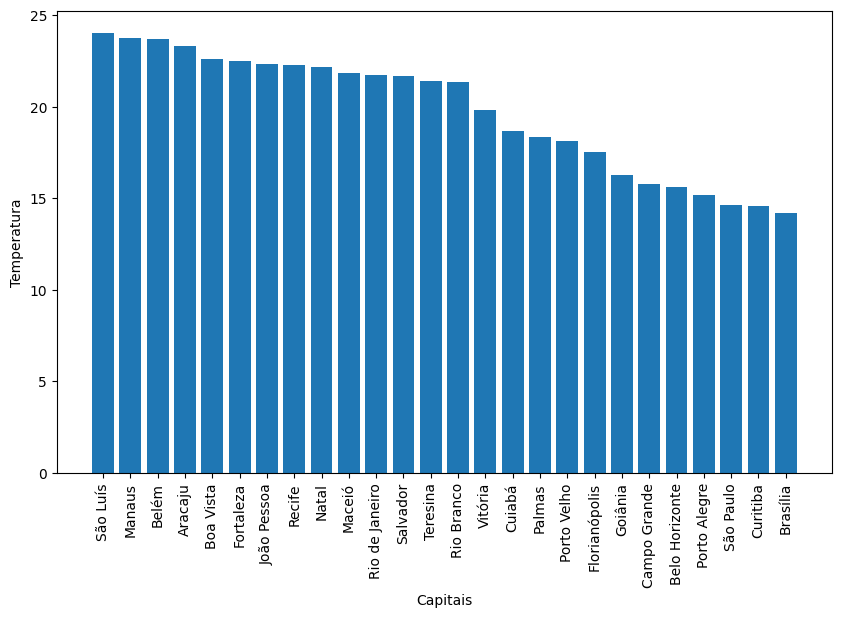

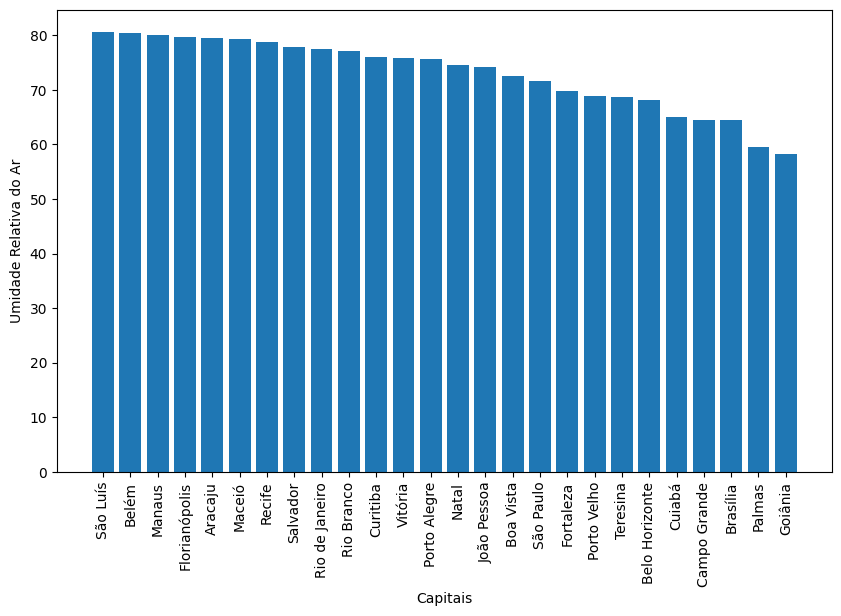

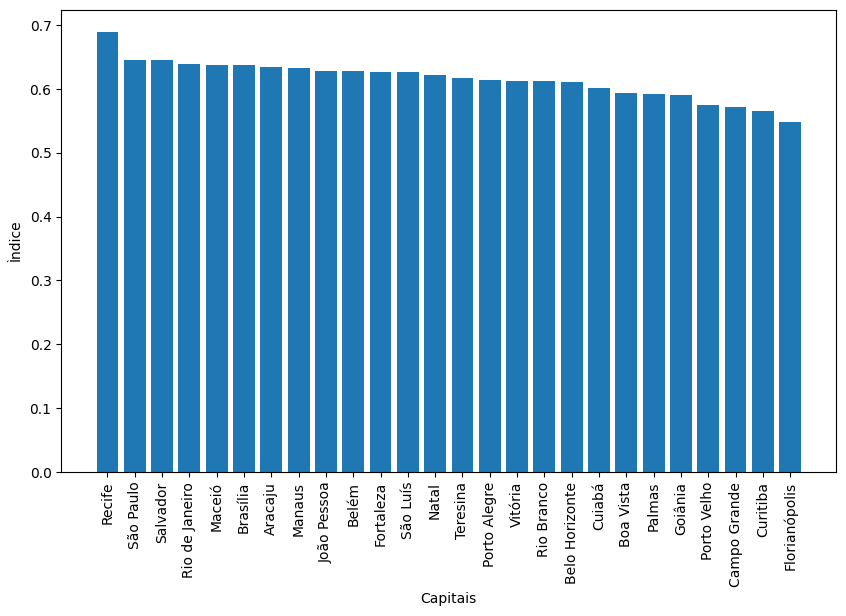

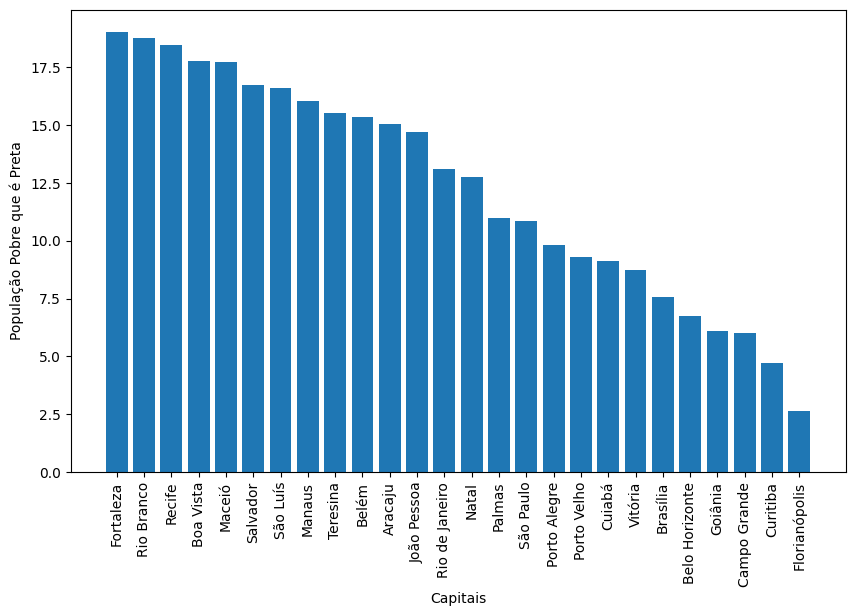

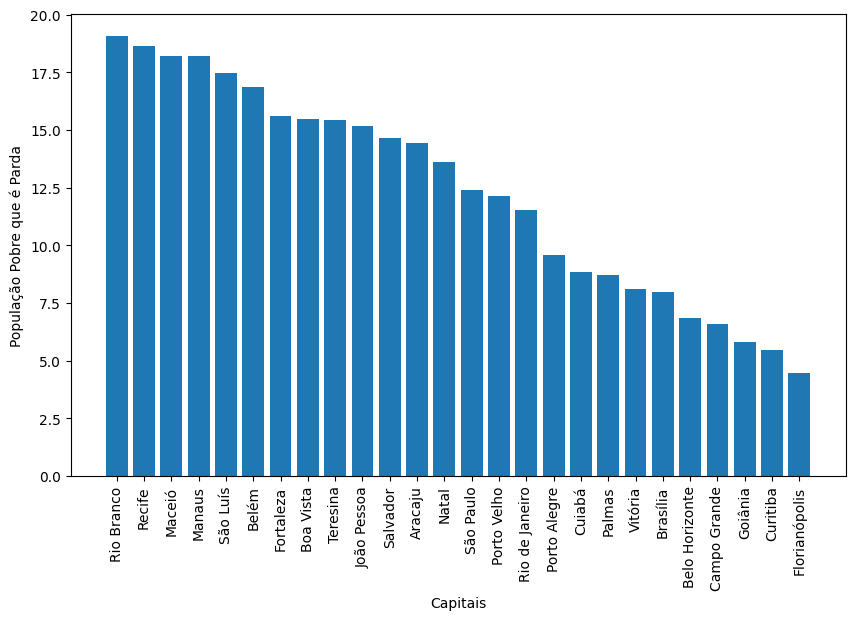

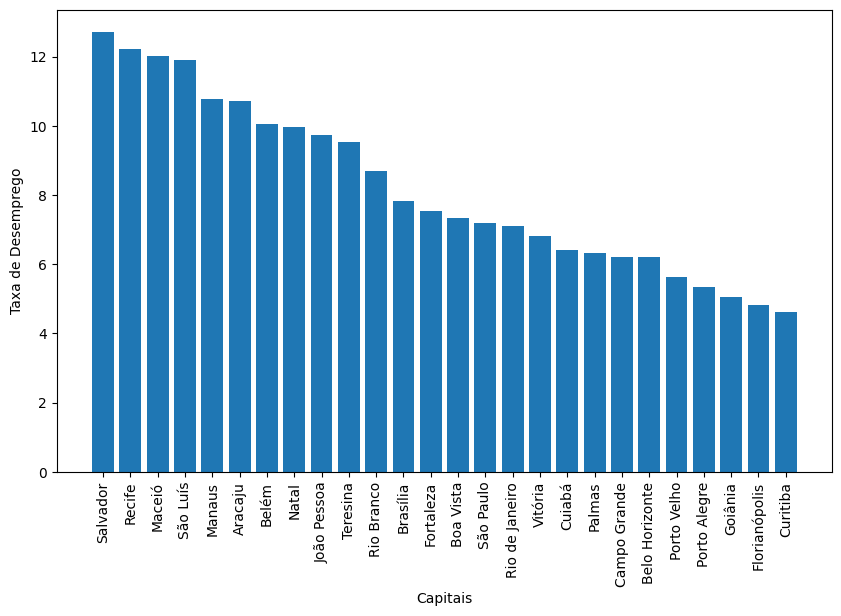

In [150]:
import matplotlib.pyplot as plt


df2 = df2.sort_values('Temperatura', ascending=False)
plt.figure(figsize=(10, 6))
plt.bar(df2['Capital'], df2['Temperatura'])
plt.xlabel('Capitais')
plt.ylabel('Temperatura')
plt.xticks(rotation='vertical')
plt.show()

df2 = df2.sort_values('Unimidade Relativa do Ar', ascending=False)
plt.figure(figsize=(10, 6))
plt.bar(df2['Capital'], df2['Unimidade Relativa do Ar'])
plt.xlabel('Capitais')
plt.ylabel('Umidade Relativa do Ar')
plt.xticks(rotation='vertical')
plt.show()


df2 = df2.sort_values('Indice Gini', ascending=False)
plt.figure(figsize=(10, 6))
plt.bar(df2['Capital'], df2['Indice Gini'])
plt.xlabel('Capitais')
plt.ylabel('Ìndice')
plt.xticks(rotation='vertical')
plt.show()

df2 = df2.sort_values('Pop. Pobre Preta', ascending=False)
plt.figure(figsize=(10, 6))
plt.bar(df2['Capital'], df2['Pop. Pobre Preta'])
plt.xlabel('Capitais')
plt.ylabel('População Pobre que é Preta')
plt.xticks(rotation='vertical')
plt.show()

df2 = df2.sort_values('Pop. Pobre Parda', ascending=False)
plt.figure(figsize=(10, 6))
plt.bar(df2['Capital'], df2['Pop. Pobre Parda'])
plt.xlabel('Capitais')
plt.ylabel('População Pobre que é Parda')
plt.xticks(rotation='vertical')
plt.show()

df2 = df2.sort_values('Tx. Desemprego', ascending=False)
plt.figure(figsize=(10, 6))
plt.bar(df2['Capital'], df2['Tx. Desemprego'])
plt.xlabel('Capitais')
plt.ylabel('Taxa de Desemprego')
plt.xticks(rotation='vertical')
plt.show()



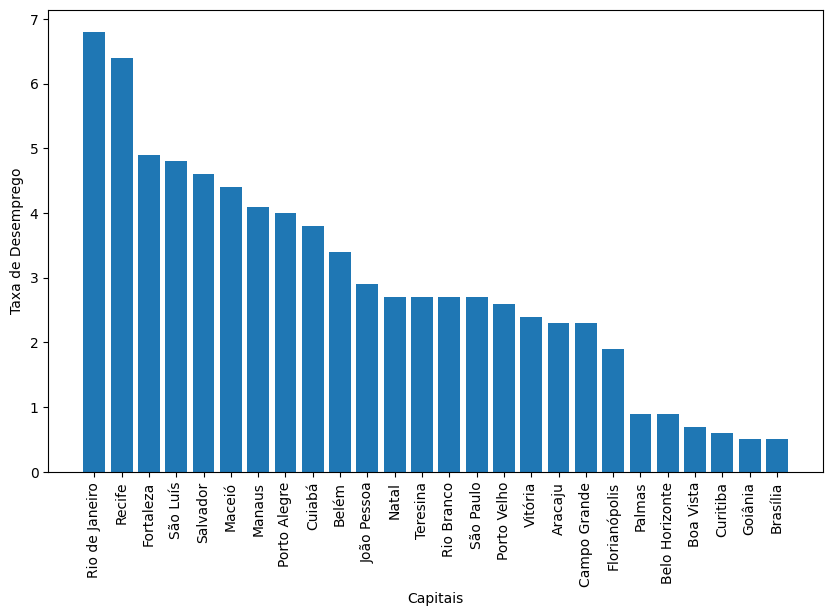

In [151]:
df2 = df2.sort_values('Obtos Tuberculose', ascending=False)
plt.figure(figsize=(10, 6))
plt.bar(df2['Capital'], df2['Obtos Tuberculose'])
plt.xlabel('Capitais')
plt.ylabel('Taxa de Desemprego')
plt.xticks(rotation='vertical')
plt.show()

In [152]:
dataframe_final = dataframe.copy()

In [153]:
dataframe_final

,Pop. Residente,IDHM 2010,Emigrantes de Países Estrangeiros,Obtos Tuberculose,Indice Gini,Pop. Pobre Branca,Pop. Pobre Preta,Pop. Pobre Parda,Pop. Pobre Total,Tx. Desemprego,Coef. de Obtos por Aids,Tx. Analfabetismo,Precipitacao Total(mm),Temperatura,Unimidade Relativa do Ar
13,571149.0,0.770,492.0,2.3,0.6341,9.90,15.04,14.42,12.92,10.71,4.6,6.59,1170.6,23.331515,79.529952
15,2375151.0,0.810,8119.0,0.9,0.6106,4.22,6.76,6.86,5.61,6.21,5.4,2.80,1645.6,15.614279,68.094430
4,1393399.0,0.746,2453.0,3.4,0.6284,11.44,15.37,16.87,15.28,10.07,13.7,3.31,2821.8,23.709100,80.441066
3,284313.0,0.752,1791.0,0.7,0.5936,10.65,17.78,15.47,14.76,7.33,8.4,5.66,447.0,22.601384,72.465063
25,2570160.0,0.824,8577.0,0.5,0.6370,5.32,7.55,7.96,6.77,7.83,4.6,3.59,1312.4,14.177881,64.439188
22,786797.0,0.784,3828.0,2.3,0.5720,4.27,6.02,6.60,5.40,6.22,8.6,3.80,1202.6,15.751587,64.537769
23,551098.0,0.785,812.0,3.8,0.6008,5.31,9.13,8.85,7.65,6.41,12.0,4.46,1056.4,18.660191,65.062221
19,1751907.0,0.823,13160.0,0.6,0.5652,3.51,4.71,5.44,3.87,4.61,8.0,2.09,737.8,14.570580,76.032490
20,421240.0,0.847,4622.0,1.9,0.5474,2.33,2.65,4.47,2.57,4.81,15.7,1.94,2073.2,17.522570,79.612737
8,2452185.0,0.754,4001.0,4.9,0.6267,9.85,19.04,15.60,13.61,7.53,4.5,6.82,224.0,22.491734,69.870316


### Separando Treino e Teste

In [154]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

X = dataframe_final.drop(['Obtos Tuberculose'], axis=1)
Y = dataframe_final['Obtos Tuberculose']


X_train, X_valid, Y_train, Y_valid = train_test_split(
	X, Y, train_size=0.8, test_size=0.2, random_state=0)

X_train

,Pop. Residente,IDHM 2010,Emigrantes de Países Estrangeiros,Indice Gini,Pop. Pobre Branca,Pop. Pobre Preta,Pop. Pobre Parda,Pop. Pobre Total,Tx. Desemprego,Coef. de Obtos por Aids,Tx. Analfabetismo,Precipitacao Total(mm),Temperatura,Unimidade Relativa do Ar
6,1014837.0,0.768,837.0,0.6266,12.44,16.61,17.46,15.83,11.92,9.5,4.58,1565.6,24.024387,80.635857
2,1802014.0,0.737,4653.0,0.6334,13.07,16.06,18.21,16.76,10.79,13.1,3.91,1704.0,23.768533,80.032274
11,1537704.0,0.772,3473.0,0.6894,10.03,18.48,18.64,15.06,12.21,11.8,6.90,1723.6,22.254306,78.857537
1,336038.0,0.727,655.0,0.6121,12.17,18.76,19.08,17.34,8.69,2.4,8.86,1142.6,21.339909,77.170400
21,1409351.0,0.805,8845.0,0.6144,4.73,9.81,9.57,5.75,5.35,34.4,2.18,1481.2,15.185927,75.750886
15,2375151.0,0.810,8119.0,0.6106,4.22,6.76,6.86,5.61,6.21,5.4,2.80,1645.6,15.614279,68.094430
24,1302001.0,0.799,3368.0,0.5908,4.62,6.09,5.79,5.25,5.05,6.5,3.10,758.0,16.289622,58.193456
16,327801.0,0.845,1518.0,0.6124,3.73,8.72,8.10,6.04,6.82,9.2,2.46,1429.8,19.790349,75.793856
7,814230.0,0.751,178.0,0.6171,10.66,15.54,15.45,14.17,9.55,6.8,8.78,885.6,21.412719,68.609025
20,421240.0,0.847,4622.0,0.5474,2.33,2.65,4.47,2.57,4.81,15.7,1.94,2073.2,17.522570,79.612737


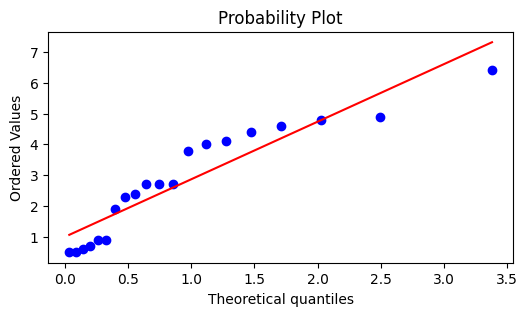

In [155]:
plt.figure(figsize=(6,3))
stats.probplot(Y_train, dist='expon', plot=plt)
plt.show()

##### **Métodos de Regressão**

**Random Tree Forest:** *O algoritmo criará uma estrutura similar a um fluxograma, com “nós” onde uma condição é verificada, e se atendida o fluxo segue por um ramo, caso contrário, por outro, sempre levando ao próximo nó, até a finalização da árvore.*

In [186]:
#Features escolhidas
lista = [
    "IDHM 2010",
    "Indice Gini",
    "Pop. Pobre Total",
    "Coef. de Obtos por Aids",
    "Temperatura",
    "Unimidade Relativa do Ar",
    "Emigrantes de Países Estrangeiros"
]


In [188]:
n_samples = 100 # Number of samples
n_features = 7 # Number of features
n_informative = 0 # Number of informative features i.e. actual features which influence the output

In [192]:
X, y,coef = make_regression(n_samples=n_samples, n_features=n_features, n_informative=n_informative, random_state=None, shuffle=False,noise=20,coef=True)
df1 = pd.DataFrame(data=X,columns=lista)
df2=pd.DataFrame(data=y,columns=['y'])
df=pd.concat([df1,df2],axis=1)
df.tail(5)

,IDHM 2010,Indice Gini,Pop. Pobre Total,Coef. de Obtos por Aids,Temperatura,Unimidade Relativa do Ar,Emigrantes de Países Estrangeiros,y
95,1.190268,-0.896387,-0.212294,-0.147308,0.135098,-0.672232,0.918560,20.745017
96,0.252519,0.878337,-1.658187,0.329732,-0.001213,0.336614,0.432137,-30.765120
97,-0.497591,-1.432534,-1.080282,-0.105595,-0.211548,-1.103660,0.381748,0.792810
98,-1.177888,-0.323900,-1.677359,0.466987,0.019613,0.165138,0.378669,-17.554872
99,-0.354482,-1.653766,-2.260499,0.865980,0.044161,-0.782523,-0.109249,-19.272118


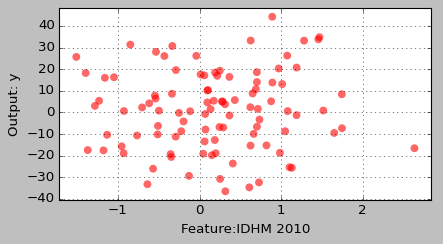

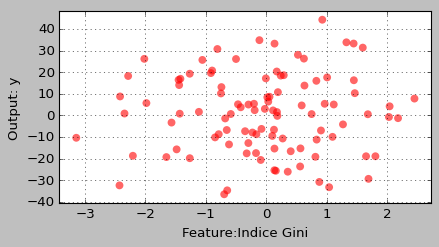

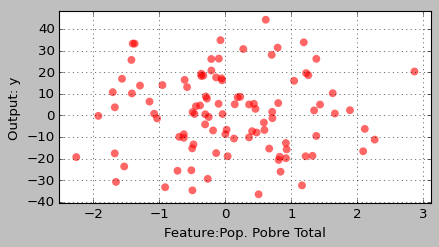

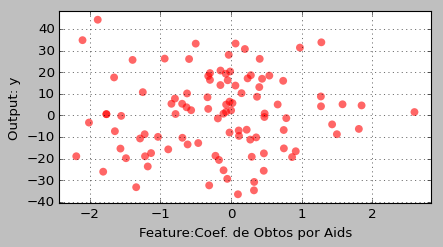

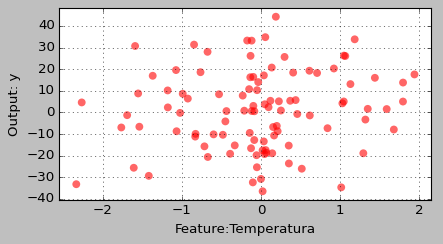

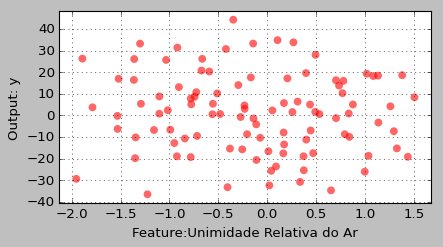

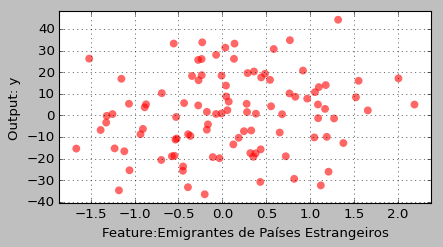

In [203]:
with plt.style.context('classic'):
    for i,col in enumerate(df.columns[:-1]):
        plt.figure(figsize=(6,3))
        plt.grid(True)
        plt.xlabel('Feature:'+col,fontsize=12)
        plt.ylabel('Output: y',fontsize=12)
        plt.scatter(df[col],df['y'],c='red',s=50,alpha=0.6)

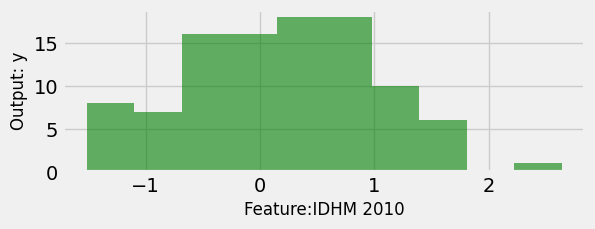

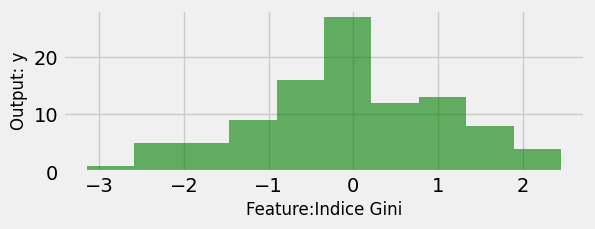

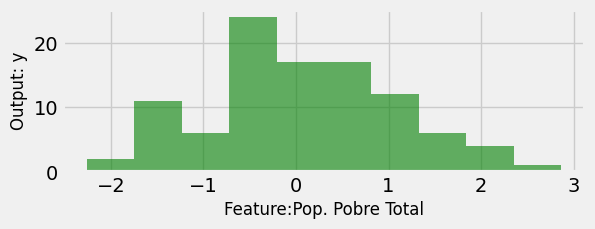

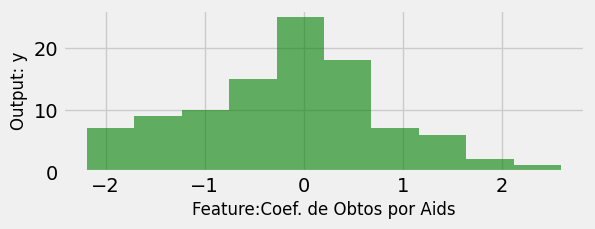

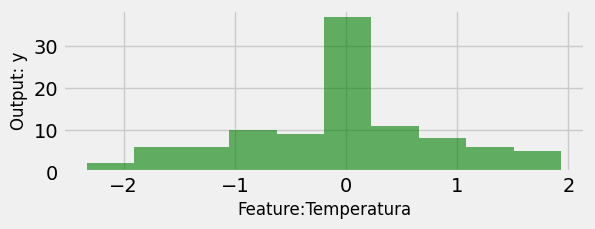

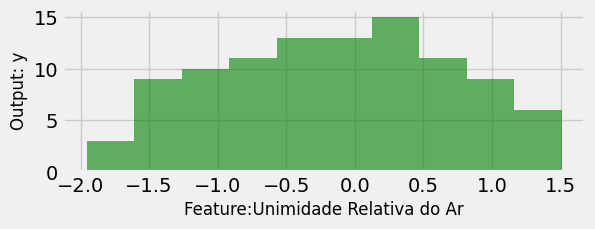

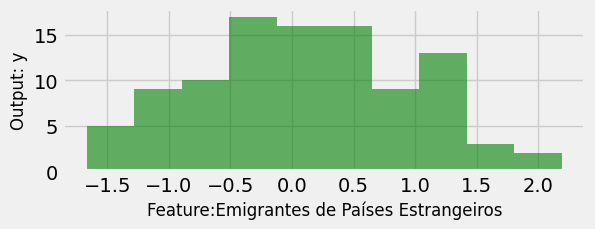

In [205]:
with plt.style.context(('fivethirtyeight')):
    for i,col in enumerate(df.columns[:-1]):
        plt.figure(figsize=(6,2))
        plt.grid(True)
        plt.xlabel('Feature:'+col,fontsize=12)
        plt.ylabel('Output: y',fontsize=12)
        plt.hist(df[col],alpha=0.6,facecolor='g')

In [206]:
tree_model = tree.DecisionTreeRegressor(max_depth=5,random_state=None)
tree_model.fit(X,y)

DecisionTreeRegressor(max_depth=5)

## Regressão Múltipla:

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.linear_model import LinearRegression
 
model_LR = LinearRegression()
model_LR.fit(X_train, Y_train)
Y_pred = model_LR.predict(X_valid)
 
print(mean_absolute_percentage_error(Y_valid, Y_pred))

0.6311454629890697


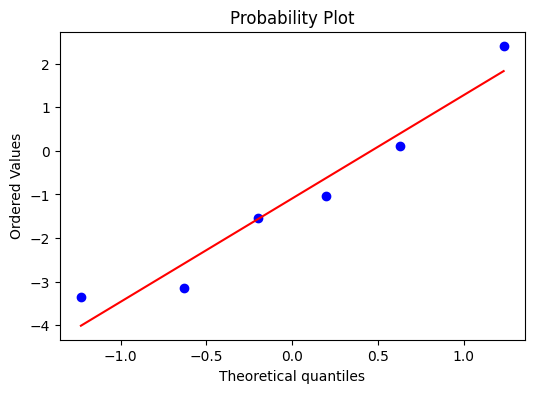

In [ ]:
residuos_test = Y_valid - Y_pred
plt.figure(figsize=(6,4))
stats.probplot(residuos_test,plot = plt)
plt.show()

In [ ]:
import statsmodels.api as sm
def regress(Y,X):
    '''
    Y: coluna do DataFrame utilizada como variável resposta (TARGET)
    X: coluna(s) do DataFrame utilizadas como variável(is) explicativas (FEATURES)
    '''
    X_cp = sm.add_constant(X)
    model = sm.OLS(Y,X_cp)
    results = model.fit()
    
    return results

ModuleNotFoundError: No module named 'statsmodels'

In [ ]:
results = regress(Y_train, X_train)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Obtos Tuberculose   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     8.499
Date:                Wed, 29 Nov 2023   Prob (F-statistic):             0.0137
Time:                        15:54:02   Log-Likelihood:                -7.1904
No. Observations:                  20   AIC:                             44.38
Df Residuals:                       5   BIC:                             59.32
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                      103.8855     29.251      3.552      0.016      28.694     179.077
Pop. Residente            2.463e-07   1.18e-07      2.095      0.090   -5.59e-08    5.48e-07
IDHM 2010                  -74.5032     23.273     -3.201      0.024    -134.328     -14.678
Indice Gini                -45.3277     22.150     -2.046      0.096    -102.267      11.612
Pop. Pobre Branca           -1.3865      0.383     -3.619      0.015      -2.371      -0.402
Pop. Pobre Preta            -0.8692      0.328     -2.650      0.045      -1.712      -0.026
Pop. Pobre Parda             3.5784      0.818      4.373      0.007       1.475       5.682
Pop. Pobre Total            -2.3888      0.678     -3.525      0.017      -4.131      -0.647
Tx. Desemprego               1.0648      0.331      3.220      0.023       0.215       1.915
Coef. de Obtos por Aids     -0.0457      0.053     -0.859      0.430      -0.183       0.091
Tx. Analfabetismo           -0.4389      0.190     -2.311      0.069      -0.927       0.049
Precipitacao Total(mm)      -0.0021      0.001     -2.820      0.037      -0.004      -0.000
Temperatuda Max             -5.5255      2.886     -1.914      0.114     -12.945       1.894
Temperatuda Min              6.0361      2.923      2.065      0.094      -1.479      13.551
Unimidade Relativa do Ar    -0.2678      0.081     -3.303      0.021      -0.476      -0.059
==============================================================================
Omnibus:                        1.224   Durbin-Watson:                   1.750
Prob(Omnibus):                  0.542   Jarque-Bera (JB):                0.881
Skew:                          -0.493   Prob(JB):                        0.644
Kurtosis:                       2.709   Cond. No.                     6.99e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.99e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Data Processing

# Modelos de Predição

# Processo e Estatísticas de Validação

# Conclusão 

# Referências Bibliográficas